<a href="https://colab.research.google.com/github/caiom26/AnaliseDeDados/blob/main/Analise_Rebaixamento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#

In [21]:
DF=pd.read_csv('/content/Serie A 2023.csv')

In [22]:
DF.tail(5)

,Unnamed: 0,Data,Horário,Camp.,Rodada,Dia,Local,Resultado,GP,GC_x,...,FK,PB,PT_x,CaGC,GC_y,GC_y.1,Defesas,PT_y,GPC,Time
755,45,2023-11-12,18:30,Série A,Rodada da semana 34,dom,Visitante,D,1,2,...,0.0,0,0,6,2.0,2,4,0,0,America MG
756,46,2023-11-26,18:30,Série A,Rodada da semana 35,dom,Em casa,D,0,3,...,0.0,0,0,8,3.0,3,5,0,0,America MG
757,47,2023-11-29,21:30,Série A,Rodada da semana 36,qua,Visitante,D,0,4,...,0.0,0,0,12,4.0,4,9,0,0,America MG
758,48,2023-12-03,18:30,Série A,Rodada da semana 37,dom,Em casa,V,3,2,...,0.0,0,0,5,2.0,2,3,1,1,America MG
759,49,2023-12-06,19:00,Série A,Rodada da semana 38,qua,Visitante,D,0,1,...,0.0,0,0,2,1.0,1,1,0,0,America MG


In [23]:
DF.columns

Index(['Unnamed: 0', 'Data', 'Horário', 'Camp.', 'Rodada', 'Dia', 'Local',
       'Resultado', 'GP', 'GC_x', 'Oponente', 'xG', 'xGA', 'Posse', 'Público',
       'Capitão', 'Formação', 'Árbitro', 'Relatório da Partida', 'Notas', 'TC',
       'CaG', 'Dist', 'FK', 'PB', 'PT_x', 'CaGC', 'GC_y', 'GC_y.1', 'Defesas',
       'PT_y', 'GPC', 'Time'],
      dtype='object')

In [24]:
DF['Relatório da Partida'].nunique()


1

In [ ]:

DF['Time'].unique()

array(['Palmeiras', 'Gremio', 'Atletico Mineiro', 'Flamengo',
       'Botafogo RJ', 'Bragantino', 'Fluminense', 'Athletico Paranaense',
       'Internacional', 'Fortaleza', 'Sao Paulo', 'Cuiaba', 'Corinthians',
       'Cruzeiro', 'Vasco da Gama', 'Bahia', 'Santos', 'Goias',
       'Coritiba', 'America MG'], dtype=object)


Para entender como essa tabela funcionava, eu quis entender como os resultados estavam descritos.

In [ ]:
DF['Time'].value_counts()

,count
Time,
Palmeiras,38
Gremio,38
Coritiba,38
Goias,38
Santos,38
Bahia,38
Vasco da Gama,38
Cruzeiro,38
Corinthians,38


Agora eu quero desmembrar o saldo de gols como visitante e mandante

In [25]:
DFFinal=pd.DataFrame()

In [26]:
DFFinal['GP']=DF.groupby(['Time','Local'])['GP'].sum()

In [28]:
DFFinal['GC']=DF.groupby(['Time','Local'])['GC_x'].sum()

In [29]:
DFFinal.head()

GP  GC
Time                 Local            
America MG           Em casa    21  38
                     Visitante  21  43
Athletico Paranaense Em casa    33  19
                     Visitante  18  24
Atletico Mineiro     Em casa    28  16

In [30]:
DF['Pontos'] = DF['Resultado'].replace({'D': 0, 'E': 1, 'V': 3})
DF.head()

<ipython-input-30-571a3fd34e50>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  DF['Pontos'] = DF['Resultado'].replace({'D': 0, 'E': 1, 'V': 3})


,Unnamed: 0,Data,Horário,Camp.,Rodada,Dia,Local,Resultado,GP,GC_x,...,PB,PT_x,CaGC,GC_y,GC_y.1,Defesas,PT_y,GPC,Time,Pontos
0,1,2023-04-15,16:00,Série A,Rodada da semana 1,sáb,Em casa,V,2,1,...,0,0,4,1.0,1,3,0,0,Palmeiras,3
1,3,2023-04-23,16:00,Série A,Rodada da semana 2,dom,Visitante,E,2,2,...,0,0,3,2.0,2,1,0,0,Palmeiras,1
2,4,2023-04-29,18:30,Série A,Rodada da semana 3,sáb,Em casa,V,2,1,...,0,0,2,1.0,1,2,0,0,Palmeiras,3
3,6,2023-05-07,18:30,Série A,Rodada da semana 4,dom,Visitante,V,5,0,...,0,0,4,0.0,0,4,0,0,Palmeiras,3
4,7,2023-05-10,21:30,Série A,Rodada da semana 5,qua,Em casa,V,4,1,...,1,1,2,1.0,1,1,0,0,Palmeiras,3


In [31]:
DFFinal['Pontos']=DF.groupby(['Time','Local'])['Pontos'].sum()

In [32]:
DFFinal.head()

GP  GC  Pontos
Time                 Local                    
America MG           Em casa    21  38      17
                     Visitante  21  43       7
Athletico Paranaense Em casa    33  19      38
                     Visitante  18  24      18
Atletico Mineiro     Em casa    28  16      36

In [33]:
DFFinal['Aproveitamento %']=((DFFinal['Pontos']/57)*100).round(2)
DFFinal.head()

GP  GC  Pontos  Aproveitamento %
Time                 Local                                      
America MG           Em casa    21  38      17             29.82
                     Visitante  21  43       7             12.28
Athletico Paranaense Em casa    33  19      38             66.67
                     Visitante  18  24      18             31.58
Atletico Mineiro     Em casa    28  16      36             63.16

In [34]:
DFFinal.head()

GP  GC  Pontos  Aproveitamento %
Time                 Local                                      
America MG           Em casa    21  38      17             29.82
                     Visitante  21  43       7             12.28
Athletico Paranaense Em casa    33  19      38             66.67
                     Visitante  18  24      18             31.58
Atletico Mineiro     Em casa    28  16      36             63.16

In [35]:
DFTotal=pd.DataFrame()

In [39]:
# Separando as linhas ímpares (infos como mandante) e pares (infos como visitante)
infos_casa = DFFinal.iloc[::2].reset_index(drop=True)
infos_fora = DFFinal.iloc[1::2].reset_index(drop=True)

# Renomeando as colunas para diferenciar casa e fora
infos_casa.columns = [f"{col}_casa" for col in DFFinal.columns]
infos_fora.columns = [f"{col}_fora" for col in DFFinal.columns]

# Combinando as informações de casa e fora em uma única linha
df_combined = pd.concat([infos_casa, infos_fora], axis=1)

In [38]:
DFFinal=DFFinal.reset_index()
DFFinal.head()

,Time,Local,GP,GC,Pontos,Aproveitamento %
0,America MG,Em casa,21,38,17,29.82
1,America MG,Visitante,21,43,7,12.28
2,Athletico Paranaense,Em casa,33,19,38,66.67
3,Athletico Paranaense,Visitante,18,24,18,31.58
4,Atletico Mineiro,Em casa,28,16,36,63.16


In [40]:
df_combined.head()

,Time_casa,Local_casa,GP_casa,GC_casa,Pontos_casa,Aproveitamento %_casa,Time_fora,Local_fora,GP_fora,GC_fora,Pontos_fora,Aproveitamento %_fora
0,America MG,Em casa,21,38,17,29.82,America MG,Visitante,21,43,7,12.28
1,Athletico Paranaense,Em casa,33,19,38,66.67,Athletico Paranaense,Visitante,18,24,18,31.58
2,Atletico Mineiro,Em casa,28,16,36,63.16,Atletico Mineiro,Visitante,24,16,30,52.63
3,Bahia,Em casa,29,21,29,50.88,Bahia,Visitante,21,32,15,26.32
4,Botafogo RJ,Em casa,36,17,37,64.91,Botafogo RJ,Visitante,22,20,27,47.37


In [41]:
df_combined.drop(columns='Time_fora')
df_combined.head()

,Time_casa,Local_casa,GP_casa,GC_casa,Pontos_casa,Aproveitamento %_casa,Time_fora,Local_fora,GP_fora,GC_fora,Pontos_fora,Aproveitamento %_fora
0,America MG,Em casa,21,38,17,29.82,America MG,Visitante,21,43,7,12.28
1,Athletico Paranaense,Em casa,33,19,38,66.67,Athletico Paranaense,Visitante,18,24,18,31.58
2,Atletico Mineiro,Em casa,28,16,36,63.16,Atletico Mineiro,Visitante,24,16,30,52.63
3,Bahia,Em casa,29,21,29,50.88,Bahia,Visitante,21,32,15,26.32
4,Botafogo RJ,Em casa,36,17,37,64.91,Botafogo RJ,Visitante,22,20,27,47.37


In [42]:
df_combined=df_combined.rename(columns={'Time_casa':'Time'})

In [43]:
df_combined.head()

,Time,Local_casa,GP_casa,GC_casa,Pontos_casa,Aproveitamento %_casa,Time_fora,Local_fora,GP_fora,GC_fora,Pontos_fora,Aproveitamento %_fora
0,America MG,Em casa,21,38,17,29.82,America MG,Visitante,21,43,7,12.28
1,Athletico Paranaense,Em casa,33,19,38,66.67,Athletico Paranaense,Visitante,18,24,18,31.58
2,Atletico Mineiro,Em casa,28,16,36,63.16,Atletico Mineiro,Visitante,24,16,30,52.63
3,Bahia,Em casa,29,21,29,50.88,Bahia,Visitante,21,32,15,26.32
4,Botafogo RJ,Em casa,36,17,37,64.91,Botafogo RJ,Visitante,22,20,27,47.37


In [44]:

df_combined.drop(columns=['Local_casa'],inplace=True)
df_combined.drop(columns=['Local_fora'],inplace=True)
df_combined.head()

,Time,GP_casa,GC_casa,Pontos_casa,Aproveitamento %_casa,Time_fora,GP_fora,GC_fora,Pontos_fora,Aproveitamento %_fora
0,America MG,21,38,17,29.82,America MG,21,43,7,12.28
1,Athletico Paranaense,33,19,38,66.67,Athletico Paranaense,18,24,18,31.58
2,Atletico Mineiro,28,16,36,63.16,Atletico Mineiro,24,16,30,52.63
3,Bahia,29,21,29,50.88,Bahia,21,32,15,26.32
4,Botafogo RJ,36,17,37,64.91,Botafogo RJ,22,20,27,47.37


In [45]:
df_combined.drop(columns=['Time_fora'],inplace=True)

In [46]:
df_combined.head()

,Time,GP_casa,GC_casa,Pontos_casa,Aproveitamento %_casa,GP_fora,GC_fora,Pontos_fora,Aproveitamento %_fora
0,America MG,21,38,17,29.82,21,43,7,12.28
1,Athletico Paranaense,33,19,38,66.67,18,24,18,31.58
2,Atletico Mineiro,28,16,36,63.16,24,16,30,52.63
3,Bahia,29,21,29,50.88,21,32,15,26.32
4,Botafogo RJ,36,17,37,64.91,22,20,27,47.37


In [47]:
# Dados dos clubes e receitas
receita_clubes = {
    'Time': ['Flamengo', 'Palmeiras', 'São Paulo', 'Corinthians', 'Fluminense',
              'Atlético-MG', 'Botafogo', 'Red Bull Bragantino', 'Grêmio', 'Santos',
              'Internacional', 'Vasco', 'Athletico-PR', 'Fortaleza', 'Bahia', 'Coritiba',
              'Cruzeiro', 'América-MG', 'Cuiabá', 'Goiás'],
    'Folha_de_pagamento (R$ milhões)': [503, 448, 380, 309, 302, 279, 258, 257, 240, 203,
                             203, 182, 164, 151, 149, 135, 125, 111, 85, 58]
}

# Criando o DataFrame
df_receita = pd.DataFrame(receita_clubes)

# Exibindo o DataFrame
print(df_receita)

                   Time  Folha_de_pagamento (R$ milhões)
0              Flamengo                              503
1             Palmeiras                              448
2             São Paulo                              380
3           Corinthians                              309
4            Fluminense                              302
5           Atlético-MG                              279
6              Botafogo                              258
7   Red Bull Bragantino                              257
8                Grêmio                              240
9                Santos                              203
10        Internacional                              203
11                Vasco                              182
12         Athletico-PR                              164
13            Fortaleza                              151
14                Bahia                              149
15             Coritiba                              135
16             Cruzeiro        

In [48]:
df_receita.head()


,Time,Folha_de_pagamento (R$ milhões)
0,Flamengo,503
1,Palmeiras,448
2,São Paulo,380
3,Corinthians,309
4,Fluminense,302


In [49]:
df_combined=df_combined.merge(df_receita,on='Time')
df_combined.head()

,Time,GP_casa,GC_casa,Pontos_casa,Aproveitamento %_casa,GP_fora,GC_fora,Pontos_fora,Aproveitamento %_fora,Folha_de_pagamento (R$ milhões)
0,Bahia,29,21,29,50.88,21,32,15,26.32,149
1,Corinthians,26,23,28,49.12,21,25,22,38.60,309
2,Coritiba,17,28,16,28.07,24,45,14,24.56,135
3,Cruzeiro,14,17,20,35.09,21,15,27,47.37,125
4,Flamengo,26,16,35,61.40,30,26,31,54.39,503


In [50]:
df_combined.columns

Index(['Time', 'GP_casa', 'GC_casa', 'Pontos_casa', 'Aproveitamento %_casa',
       'GP_fora', 'GC_fora', 'Pontos_fora', 'Aproveitamento %_fora',
       'Folha_de_pagamento (R$ milhões)'],
      dtype='object')

In [52]:
df_combined.head()

,Time,GP_casa,GC_casa,Pontos_casa,Aproveitamento %_casa,GP_fora,GC_fora,Pontos_fora,Aproveitamento %_fora,Folha_de_pagamento (R$ milhões)
0,Bahia,29,21,29,50.88,21,32,15,26.32,149
1,Corinthians,26,23,28,49.12,21,25,22,38.60,309
2,Coritiba,17,28,16,28.07,24,45,14,24.56,135
3,Cruzeiro,14,17,20,35.09,21,15,27,47.37,125
4,Flamengo,26,16,35,61.40,30,26,31,54.39,503


In [53]:
# Pertence aos 12 grandes
Grandes = {
    'Time': ['Flamengo', 'Palmeiras', 'São Paulo', 'Corinthians', 'Fluminense',
              'Atlético-MG', 'Botafogo', 'Red Bull Bragantino', 'Grêmio', 'Santos',
              'Internacional', 'Vasco', 'Athletico-PR', 'Fortaleza', 'Bahia', 'Coritiba',
              'Cruzeiro', 'América-MG', 'Cuiabá', 'Goiás'],
    'Pertence': [1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
                             1, 1, 0, 0, 0, 0, 1, 0, 0, 0]
}

# Criando o DataFrame
df_Grandes = pd.DataFrame(Grandes)

# Exibindo o DataFrame
df_Grandes.head()

,Time,Pertence
0,Flamengo,1
1,Palmeiras,1
2,São Paulo,1
3,Corinthians,1
4,Fluminense,1


In [54]:
df_combined=df_combined.merge(df_Grandes,on='Time')
df_combined.head()

,Time,GP_casa,GC_casa,Pontos_casa,Aproveitamento %_casa,GP_fora,GC_fora,Pontos_fora,Aproveitamento %_fora,Folha_de_pagamento (R$ milhões),Pertence
0,Bahia,29,21,29,50.88,21,32,15,26.32,149,0
1,Corinthians,26,23,28,49.12,21,25,22,38.60,309,1
2,Coritiba,17,28,16,28.07,24,45,14,24.56,135,0
3,Cruzeiro,14,17,20,35.09,21,15,27,47.37,125,1
4,Flamengo,26,16,35,61.40,30,26,31,54.39,503,1


In [55]:
#Rebaixamento
Rebaixamento = {
    'Time': ['Flamengo', 'Palmeiras', 'São Paulo', 'Corinthians', 'Fluminense',
              'Atlético-MG', 'Botafogo', 'Red Bull Bragantino', 'Grêmio', 'Santos',
              'Internacional', 'Vasco', 'Athletico-PR', 'Fortaleza', 'Bahia', 'Coritiba',
              'Cruzeiro', 'América-MG', 'Cuiabá', 'Goiás'],
    'Rebaixado': [0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
                             0, 0, 0, 0, 0, 1, 0, 1, 0, 1]
}

# Criando o DataFrame
df_Rebaixamento = pd.DataFrame(Rebaixamento)

# Exibindo o DataFrame
df_Rebaixamento.head()

,Time,Rebaixado
0,Flamengo,0
1,Palmeiras,0
2,São Paulo,0
3,Corinthians,0
4,Fluminense,0


In [56]:
df_combined=df_combined.merge(df_Rebaixamento,on='Time')
df_combined.head()

,Time,GP_casa,GC_casa,Pontos_casa,Aproveitamento %_casa,GP_fora,GC_fora,Pontos_fora,Aproveitamento %_fora,Folha_de_pagamento (R$ milhões),Pertence,Rebaixado
0,Bahia,29,21,29,50.88,21,32,15,26.32,149,0,0
1,Corinthians,26,23,28,49.12,21,25,22,38.60,309,1,0
2,Coritiba,17,28,16,28.07,24,45,14,24.56,135,0,1
3,Cruzeiro,14,17,20,35.09,21,15,27,47.37,125,1,0
4,Flamengo,26,16,35,61.40,30,26,31,54.39,503,1,0


In [57]:
df_combined=df_combined.set_index('Time')

In [58]:
df_combined.head()

,GP_casa,GC_casa,Pontos_casa,Aproveitamento %_casa,GP_fora,GC_fora,Pontos_fora,Aproveitamento %_fora,Folha_de_pagamento (R$ milhões),Pertence,Rebaixado
Time,,,,,,,,,,,
Bahia,29,21,29,50.88,21,32,15,26.32,149,0,0
Corinthians,26,23,28,49.12,21,25,22,38.60,309,1,0
Coritiba,17,28,16,28.07,24,45,14,24.56,135,0,1
Cruzeiro,14,17,20,35.09,21,15,27,47.37,125,1,0
Flamengo,26,16,35,61.40,30,26,31,54.39,503,1,0


In [59]:
df_combined=df_combined.drop(columns=['Pontos_casa','Pontos_fora'])

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [141]:
y=df_combined['Rebaixado']
X=df_combined.drop(columns=['Rebaixado'])

In [142]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [143]:
RFC2023=RandomForestClassifier()

In [144]:
RFC2023.fit(x_train,y_train)

RandomForestClassifier()

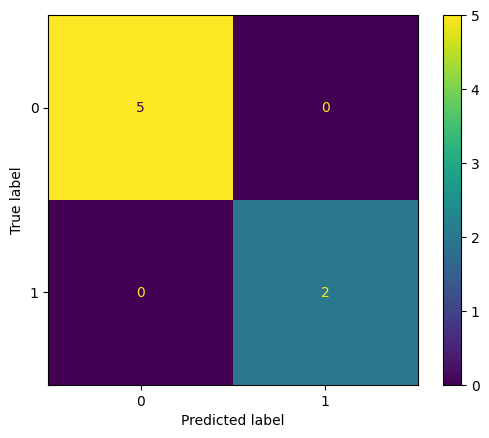

In [145]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm = confusion_matrix(y_train, RFC2023.predict(x_train))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [146]:
# Obtendo a importância das variáveis
importances = RFC2023.feature_importances_

# Criando um DataFrame para exibir as variáveis e suas importâncias
feature_importances2023 = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Exibindo as variáveis mais importantes
feature_importances2023.head()

,Feature,Importance
2,Aproveitamento %_casa,0.276221
1,GC_casa,0.213168
5,Aproveitamento %_fora,0.184310
4,GC_fora,0.157295
3,GP_fora,0.068498


Agora vamos utilizar os campeonatos brasileiros de 2022 e 2019 para verificar como as variáveis se comportam

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
BR2022=pd.read_excel('/content/Brasileiro 2022.xlsx')

In [75]:
BR2022.head()

,Times,Pontuação,Posição,Aproveitamento,Rebaixado,GP_em casa,GP_fora,GC_em casa,GC_fora,Aproveitamento em casa,Aproveitamento fora,Folha de Pagamento
0,Palmeiras,81,1,71%,0,40,27,12,15,0.754386,0.666667,384.0
1,Internacional,73,2,64%,0,39,18,14,17,0.771930,0.508772,216.0
2,Fluminense,70,3,61%,0,39,24,20,21,0.684211,0.543860,156.0
3,Corinthians,65,4,57%,0,24,20,11,25,0.701754,0.438596,276.0
4,Flamengo,62,5,54%,0,37,23,15,24,0.631579,0.456140,432.0


In [76]:
Br2022=BR2022.set_index('Times')

In [77]:
Br2022.head()

,Pontuação,Posição,Aproveitamento,Rebaixado,GP_em casa,GP_fora,GC_em casa,GC_fora,Aproveitamento em casa,Aproveitamento fora,Folha de Pagamento
Times,,,,,,,,,,,
Palmeiras,81,1,71%,0,40,27,12,15,0.754386,0.666667,384.0
Internacional,73,2,64%,0,39,18,14,17,0.771930,0.508772,216.0
Fluminense,70,3,61%,0,39,24,20,21,0.684211,0.543860,156.0
Corinthians,65,4,57%,0,24,20,11,25,0.701754,0.438596,276.0
Flamengo,62,5,54%,0,37,23,15,24,0.631579,0.456140,432.0


In [78]:
BR2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Times                   20 non-null     object 
 1   Pontuação               20 non-null     int64  
 2   Posição                 20 non-null     int64  
 3   Aproveitamento          20 non-null     object 
 4   Rebaixado               20 non-null     int64  
 5   GP_em casa              20 non-null     int64  
 6   GP_fora                 20 non-null     int64  
 7   GC_em casa              20 non-null     int64  
 8   GC_fora                 20 non-null     int64  
 9   Aproveitamento em casa  20 non-null     float64
 10  Aproveitamento fora     20 non-null     float64
 11  Folha de Pagamento      20 non-null     float64
dtypes: float64(3), int64(7), object(2)
memory usage: 2.0+ KB


In [79]:


BR2022=BR2022.drop(columns=['Posição'])


In [81]:
BR2022.head()

,Times,Pontuação,Aproveitamento,Rebaixado,GP_em casa,GP_fora,GC_em casa,GC_fora,Aproveitamento em casa,Aproveitamento fora,Folha de Pagamento
0,Palmeiras,81,71%,0,40,27,12,15,0.754386,0.666667,384.0
1,Internacional,73,64%,0,39,18,14,17,0.771930,0.508772,216.0
2,Fluminense,70,61%,0,39,24,20,21,0.684211,0.543860,156.0
3,Corinthians,65,57%,0,24,20,11,25,0.701754,0.438596,276.0
4,Flamengo,62,54%,0,37,23,15,24,0.631579,0.456140,432.0


In [99]:
BR2022=BR2022.drop(columns=['Pontuação'])
BR2022=BR2022.drop(columns=['Aproveitamento'])

KeyError: "['Pontuação'] not found in axis"

In [107]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [115]:
y=BR2022['Rebaixado']
X=BR2022.drop(columns=['Rebaixado'])

In [133]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [134]:
RFC2022=RandomForestClassifier()

In [135]:
RFC2022.fit(x_train,y_train)

RandomForestClassifier()

In [94]:
BR2022.head()

,Rebaixado,GP_em casa,GP_fora,GC_em casa,GC_fora,Aproveitamento em casa,Aproveitamento fora,Folha de Pagamento
Times,,,,,,,,
Palmeiras,0,40,27,12,15,0.754386,0.666667,384.0
Internacional,0,39,18,14,17,0.771930,0.508772,216.0
Fluminense,0,39,24,20,21,0.684211,0.543860,156.0
Corinthians,0,24,20,11,25,0.701754,0.438596,276.0
Flamengo,0,37,23,15,24,0.631579,0.456140,432.0


In [136]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

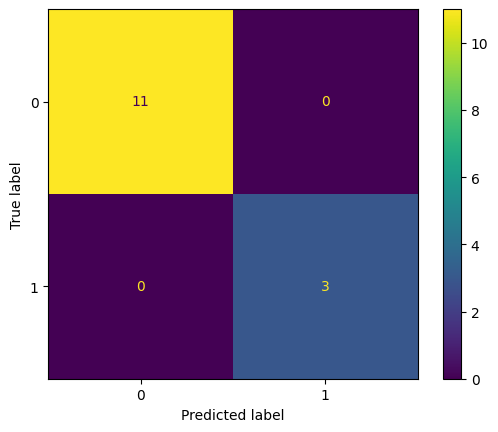

In [137]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm = confusion_matrix(y_train, RFC2022.predict(x_train))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [139]:
# Obtendo a importância das variáveis
importances = RFC2022.feature_importances_

# Criando um DataFrame para exibir as variáveis e suas importâncias
feature_importances2022 = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Exibindo as variáveis mais importantes
feature_importances2022.head()

,Feature,Importance
0,GP_em casa,0.316912
4,Aproveitamento em casa,0.238972
5,Aproveitamento fora,0.237732
1,GP_fora,0.131504
3,GC_fora,0.050232


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
BR2019=pd.read_excel('/content/Brasileiro 2019.xlsx')

In [5]:
BR2019=BR2019.set_index('Times')

In [6]:
BR2019.head()

,Posição,Rebaixado,GP_em casa,GP_fora,GC_em casa,GC_fora,Aproveitamento em casa,Aproveitamento fora
Times,,,,,,,,
Flamengo,1,0,56,30,18,19,0.929825,0.649123
Santos,2,0,44,16,15,18,0.807018,0.491228
Palmeiras,3,0,40,21,13,19,0.754386,0.491228
Grêmio,4,0,38,26,18,21,0.684211,0.456140
Athletico Paranaense,5,0,26,25,11,21,0.684211,0.438596


In [7]:
BR2019semPosição=BR2019.drop(columns=['Posição'])

In [8]:
BR2019semPosição.head()

,Rebaixado,GP_em casa,GP_fora,GC_em casa,GC_fora,Aproveitamento em casa,Aproveitamento fora
Times,,,,,,,
Flamengo,0,56,30,18,19,0.929825,0.649123
Santos,0,44,16,15,18,0.807018,0.491228
Palmeiras,0,40,21,13,19,0.754386,0.491228
Grêmio,0,38,26,18,21,0.684211,0.456140
Athletico Paranaense,0,26,25,11,21,0.684211,0.438596


In [12]:
BR2019semPosição.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, Flamengo to Avaí
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Rebaixado               20 non-null     int64  
 1   GP_em casa              20 non-null     int64  
 2   GP_fora                 20 non-null     int64  
 3   GC_em casa              20 non-null     int64  
 4   GC_fora                 20 non-null     int64  
 5   Aproveitamento em casa  20 non-null     float64
 6   Aproveitamento fora     20 non-null     float64
dtypes: float64(2), int64(5)
memory usage: 1.8+ KB


In [124]:
y=BR2019semPosição['Rebaixado ']
X=BR2019semPosição.drop(columns=['Rebaixado '])

In [121]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [125]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [122]:
RFC2019=RandomForestClassifier()

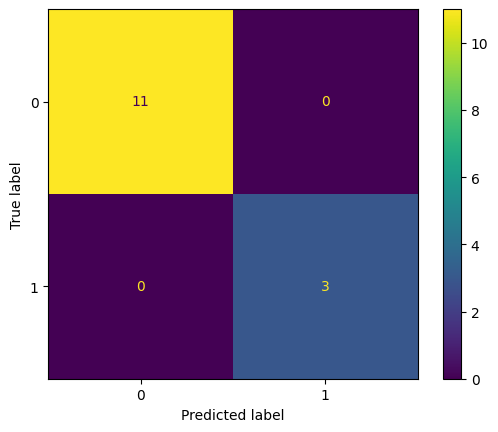

In [127]:
RFC2019.fit(x_train,y_train)
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm = confusion_matrix(y_train, RFC2019.predict(x_train))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [129]:
# Obtendo a importância das variáveis
importances = RFC2019.feature_importances_

# Criando um DataFrame para exibir as variáveis e suas importâncias
feature_importances2019 = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Exibindo as variáveis mais importantes
feature_importances2019.head()

,Feature,Importance
4,Aproveitamento em casa,0.294555
0,GP_em casa,0.282635
5,Aproveitamento fora,0.213195
1,GP_fora,0.104135
3,GC_fora,0.075580


In [147]:
feature_importances2019.head()

,Feature,Importance
4,Aproveitamento em casa,0.294555
0,GP_em casa,0.282635
5,Aproveitamento fora,0.213195
1,GP_fora,0.104135
3,GC_fora,0.075580


In [173]:
featurecombined=feature_importances2019.merge(feature_importances2022,on='Feature')

In [174]:
featurecombined

,Feature,Importance_x,Importance_y
0,Aproveitamento em casa,0.294555,0.238972
1,GP_em casa,0.282635,0.316912
2,Aproveitamento fora,0.213195,0.237732
3,GP_fora,0.104135,0.131504
4,GC_fora,0.075580,0.050232
5,GC_em casa,0.029899,0.024648


In [175]:
featurecombined['2019']=featurecombined['Importance_x']
featurecombined['2022']=featurecombined['Importance_y']
featurecombined=featurecombined.drop(columns=['Importance_x'])
featurecombined=featurecombined.drop(columns=['Importance_y'])

In [176]:
featurecombined.head()

,Feature,2019,2022
0,Aproveitamento em casa,0.294555,0.238972
1,GP_em casa,0.282635,0.316912
2,Aproveitamento fora,0.213195,0.237732
3,GP_fora,0.104135,0.131504
4,GC_fora,0.075580,0.050232


In [177]:
featurecombined=featurecombined.merge(feature_importances2023,on='Feature',how='outer')

In [178]:

featurecombined.head()

,Feature,2019,2022,Importance
0,Aproveitamento %_casa,NaN,NaN,0.276221
1,Aproveitamento %_fora,NaN,NaN,0.184310
2,Aproveitamento em casa,0.294555,0.238972,NaN
3,Aproveitamento fora,0.213195,0.237732,NaN
4,Folha_de_pagamento (R$ milhões),NaN,NaN,0.035137


In [171]:
featurecombined=featurecombined['Importance_y'].rename('2022')

KeyError: 'Importance_y'

In [167]:
featurecombined['Importance']=featurecombined['Importance'].rename('2023')

In [168]:
featurecombined.head()

,Feature,Importance_x,Importance_y,Importance
0,Aproveitamento %_casa,NaN,NaN,0.276221
1,Aproveitamento %_fora,NaN,NaN,0.184310
2,Aproveitamento em casa,0.294555,0.238972,NaN
3,Aproveitamento fora,0.213195,0.237732,NaN
4,Folha_de_pagamento (R$ milhões),NaN,NaN,0.035137


In [180]:
featurecombined['2023']=featurecombined['Importance']
featurecombined=featurecombined.drop(columns=['Importance'])
featurecombined.head()

,Feature,2019,2022,2023
0,Aproveitamento %_casa,NaN,NaN,0.276221
1,Aproveitamento %_fora,NaN,NaN,0.184310
2,Aproveitamento em casa,0.294555,0.238972,NaN
3,Aproveitamento fora,0.213195,0.237732,NaN
4,Folha_de_pagamento (R$ milhões),NaN,NaN,0.035137


In [181]:
from google.colab import files

In [182]:
arquivo_excel = 'meu_dataframe.xlsx'
featurecombined.to_excel(arquivo_excel, index=False)
files.download(arquivo_excel)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [186]:
Conclusão=pd.read_excel('/content/DataframeFinal.xlsx')

In [188]:
print(Conclusão)

                  Feature      2019      2022      2023   Mediana     Média
0  Aproveitamento em casa  0.294555  0.238972  0.276221  0.276221  0.269916
1     Aproveitamento fora  0.213195  0.237732  0.184310  0.213195  0.211746
2                 GC_casa  0.029899  0.024648  0.213168  0.029899  0.089238
3                 GC_fora  0.075580  0.050232  0.157295  0.075580  0.094369
4                 GP_casa  0.282635  0.316912  0.052885  0.282635  0.217477
5                 GP_fora  0.104135  0.131504  0.068498  0.104135  0.101379


A partir desta análise podemos inferir que para um time que luta pelo rebaixamento, o aproveitamento em casa é mais vital que o aproveitamento fora de casa. Além disso podemos inferir que é mais vantajoso deste ponto de vista ter um ataque que realiza mais gols e uma defesa mais vazada que um time que toma menos gols mas pouco toma. Ou seja, se tratando de pontos corridos é necessário atacar o adversário não somente ficar jogando por uma bola.